## Nesterov Acclerated Gradient
#### Think momentum like  and ball on the top of the pothole and giving little push directly goes to the end of the hole which is global minimum and here it moves faster because the ball moves down the speed increases
#### It also work by giving the weight to the last occurred or calculated gradient
#### Here similar working like the ewma and same formula is applied but just small change
#### This is what momentum is .....
#### Nag is like here first the next likelyhood point is calculated by jumping to that point and then at that jumped point the gradient is calculated and then the next moving is calculaed
#### Here because of the "NAG" Less jumps are occurred lead to less and fast convergence the error plot
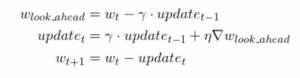

#### The comparision between both optimizer
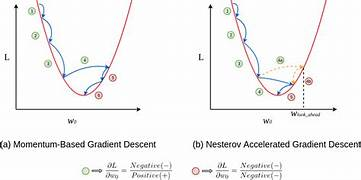

#### The main advantage of use of NAG with the stocastic gradient descent (sgd) optimizer is that it is fast compared to batch and mini batch gradient descent
#### ahere the direction of the gradient and the direction of the velocity matters and decide wheer to goo

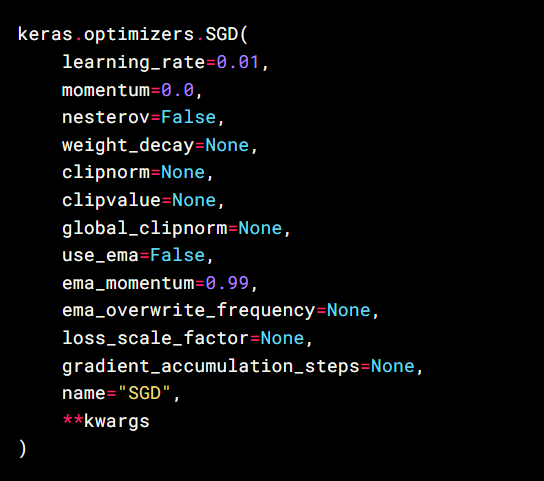

### To get the momentum in the keras we just set the momentum with the decay(beta) and nesterov = True

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [2]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.2515)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
### building the model
model = Sequential([
    Dense(10,activation='relu',input_dim=2),
    Dense(5,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
### Compiling the model
momentum = SGD(
    learning_rate = 0.01,
    momentum = 0.9, ##beta=0.9
    nesterov = True
)
model.compile(optimizer=momentum,loss='binary_crossentropy')

In [6]:
history = model.fit(
    X_train,y_train,
    epochs=100
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.7883
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.7857 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7632
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7421
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.7165 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.6992
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6850 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.6800
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6794
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.6770
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6744 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6718 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6683 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6640 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6589
Epoch 16/100

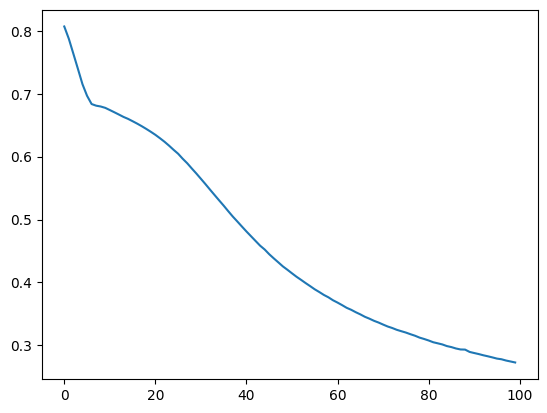

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

Main drawback of NAG is that it can stuck inside the local minimun because of less momentum